In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [19]:
def f1(x, fi):
    m = cp.Variable()
    c = cp.Variable()
    
    Objective = cp.Minimize(m*x+c)
    Constraint = []
    for i, f in enumerate(fi):
        Constraint.append(f <= m*i+c)
        
    problem = cp.Problem(objective=Objective, constraints=Constraint)
    problem.solve()
    return m.value*x + c.value

In [28]:
def f2(x, fi):
    n = len(fi)
    F = np.array(fi).reshape(-1, 1)
    alpha = cp.Variable((n, 1))
    
    Objective = cp.Maximize(alpha.T@F)
    Constraint = [
                    alpha.T@np.arange(n).reshape(-1, 1) == x,
                    alpha >= 0,
                    np.ones((1, n))@alpha == 1
                 ]
    problem = cp.Problem(objective=Objective, constraints=Constraint)
    problem.solve()
    return (alpha.value.T@F)[0, 0]

In [29]:
def f3(x, fi):
    n = len(fi)
    F = np.array(fi).reshape(-1, 1)
    alpha = cp.Variable((n, 1))
    
    Objective = cp.Minimize(alpha.T@F)
    Constraint = [
                    alpha.T@np.arange(n).reshape(-1, 1) == x,
                    alpha >= 0,
                    np.ones((1, n))@alpha == 1
                 ]
    problem = cp.Problem(objective=Objective, constraints=Constraint)
    problem.solve()
    return (alpha.value.T@F)[0, 0]

In [36]:
N = 4
x = np.linspace(0, N-1, 100)

fi = [1, 0, 2, 1]

f1i = []
f2i = []
f3i = []

for i in x:
#     print(i)
    f1i.append(f1(i, fi))
    f2i.append(f2(i, fi))
    f3i.append(f3(i, fi))

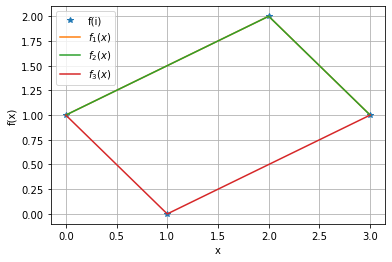

In [39]:
plt.figure()
plt.plot(fi, '*', label='f(i)')
plt.plot(x, f1i, label=r'$f_1(x)$')
plt.plot(x, f2i, label=r'$f_2(x)$')
plt.plot(x, f3i, label=r'$f_3(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.savefig('../figs/q5.png')